# Optimization using NLopt

In this example we are going to explore optimization using OpenTURNS' [NLopt](https://nlopt.readthedocs.io/en/latest/) interface.

In [102]:
from __future__ import print_function
import openturns as ot
import math as m

In [103]:
# List available algorithms
for algo in ot.NLopt.GetAlgorithmNames():
    print(algo)

AUGLAG
AUGLAG_EQ
GD_MLSL
GD_MLSL_LDS
GN_CRS2_LM
GN_DIRECT
GN_DIRECT_L
GN_DIRECT_L_NOSCAL
GN_DIRECT_L_RAND
GN_DIRECT_L_RAND_NOSCAL
GN_DIRECT_NOSCAL
GN_ESCH
GN_ISRES
GN_MLSL
GN_MLSL_LDS
GN_ORIG_DIRECT
GN_ORIG_DIRECT_L
G_MLSL
G_MLSL_LDS
LD_AUGLAG
LD_AUGLAG_EQ
LD_CCSAQ
LD_LBFGS
LD_LBFGS_NOCEDAL
LD_MMA
LD_SLSQP
LD_TNEWTON
LD_TNEWTON_PRECOND
LD_TNEWTON_PRECOND_RESTART
LD_TNEWTON_RESTART
LD_VAR1
LD_VAR2
LN_AUGLAG
LN_AUGLAG_EQ
LN_BOBYQA
LN_COBYLA
LN_NELDERMEAD
LN_NEWUOA
LN_NEWUOA_BOUND
LN_PRAXIS
LN_SBPLX


More details on NLopt algorithms are available [here](https://nlopt.readthedocs.io/en/latest/NLopt_Algorithms/).

In [104]:
# The optimization algorithm is instanciated from the NLopt name
algo = ot.NLopt('LD_SLSQP')

In [105]:
# define the problem
objective = ot.SymbolicFunction(['x1', 'x2'], ['100*(x2-x1^2)^2+(1-x1)^2'])
inequality_constraint = ot.SymbolicFunction(['x1', 'x2'], ['x1-2*x2'])
dim = objective.getInputDimension()
bounds = ot.Interval([-3.] * dim, [5.] * dim)
problem = ot.OptimizationProblem(objective)
problem.setMinimization(True)
problem.setInequalityConstraint(inequality_constraint)
problem.setBounds(bounds)

In [106]:
# solve the problem
algo.setProblem(problem)
startingPoint = [0.0] * dim
algo.setStartingPoint(startingPoint)
algo.run()

In [107]:
# retrieve results
result = algo.getResult()
print('x^=', result.getOptimalPoint())

x^= [0.517441,0.258721]


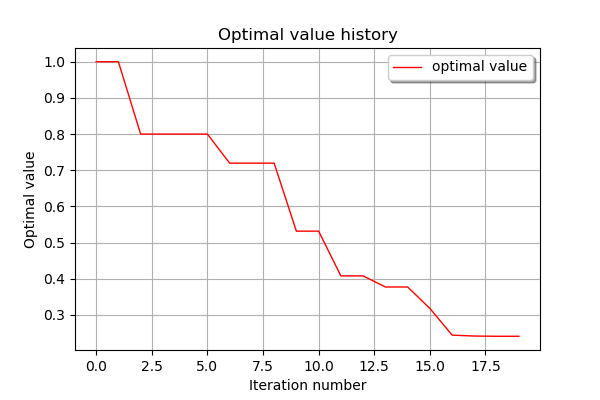

In [108]:
# draw optimal value history
result.drawOptimalValueHistory()